In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import helperfuns
from helperfuns import *
from numpy.lib.scimath import sqrt as csqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
from helperfuns import *
from equilibriumfuns import *
fig_directory = '/Users/taliaborofsky/Documents/\
PhD Research/PopDynamics_SocLearning/PopDynamics_TeX/Figures_NoDelay'
green, yellow, purple, red, blue, orange = '#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462'
from matplotlib.collections import LineCollection

from equilibria_analysis_funs import *
import multiprocessing as mp
from itertools import repeat

In [57]:
muvals = np.linspace(-1,1,2000)

μmat, whichRδ = np.meshgrid(muvals, [0,1,2,3])
μ, whichRδ = [np.ndarray.flatten(item) for item in [μmat, whichRδ]]
Rvals = np.array([0.1, 0.1, 0.4, 0.2])
δvals = np.array([0.15, 0.2, 0.5, 0.5])
R = Rvals[whichRδ]
δ = δvals[whichRδ]
list_param_vecs = np.array([μ, R, δ]).T


In [ ]:

print("Number of processors: ", mp.cpu_count())
# Step 1: Init multiprocessing.Pool()


pool = mp.Pool(mp.cpu_count())
out = pool.map(custmax_s_2,list_param_vecs)

pool.close()
outmat = np.vstack(out)

s0, s1, Nβ0, Nβ1 = outmat.T
μ, R, δ = list_param_vecs.T
df = pd.DataFrame({'s0':s0, 's1':s1, 'Nβ0':Nβ0, 'Nβ1':Nβ1,
                  'mu':μ, 'R':R, 'delta':δ })
df.to_csv('lines_sstar.csv')

Number of processors:  24


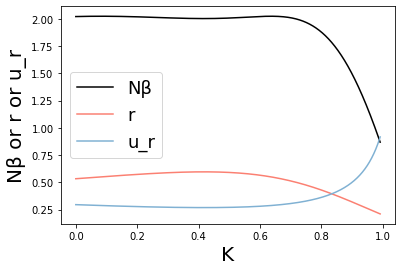

In [21]:


    
R = 0.1
δ = 0.2
mu = -0.6
svec = np.linspace(0,3,1000)
Kvec = Kfun(svec, scs.norm(mu))
pcvec = pcfun(svec, scs.norm(mu))
rvec = get_r_hat_vec1(Kvec, pcvec, δ, R)
uvec = u_r_hat(rvec,R,δ)
plt.plot(Kvec,get_Nβ_r(rvec, δ, R), color = 'k', label = 'Nβ')
plt.plot(Kvec, rvec, color = red, label = 'r')
plt.plot (Kvec, uvec, color = blue, label = 'u_r')

plt.xlabel('K', fontsize = 20)
plt.ylabel('Nβ or r or u_r', fontsize = 20)
plt.legend(fontsize = 18)


plt.show()

